✅ Label Encoder saved!
✅ Dataset split info saved!
        Split  Samples  Percentage
0       Train     1063   69.934211
1  Validation      229   15.065789
2        Test      228   15.000000
✅ TF-IDF Vectorizer saved!


C:\Users\WINDOWS 1O\.conda\envs\ed\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       171,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,357 (704.52 KB)

 Trainable params: 180,357 (704.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2643 - loss: 1.6038 - val_accuracy: 0.3275 - val_loss: 1.5939
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4497 - loss: 1.5690 - val_accuracy: 0.4192 - val_loss: 1.5593
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5945 - loss: 1.5010 - val_accuracy: 0.6114 - val_loss: 1.4787
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7432 - loss: 1.3468 - val_accuracy: 0.7336 - val_loss: 1.3100
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 1.0716 - val_accuracy: 0.7991 - val_loss: 1.0460
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9003 - loss: 0.7401 - val_accuracy: 0.8297 - val_loss: 0.7904
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9351 - loss: 0.4713 - val_accuracy: 0.8515 - val_loss: 0.6147
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9483 - loss: 0.3007 - val_accuracy: 0.8515 - v

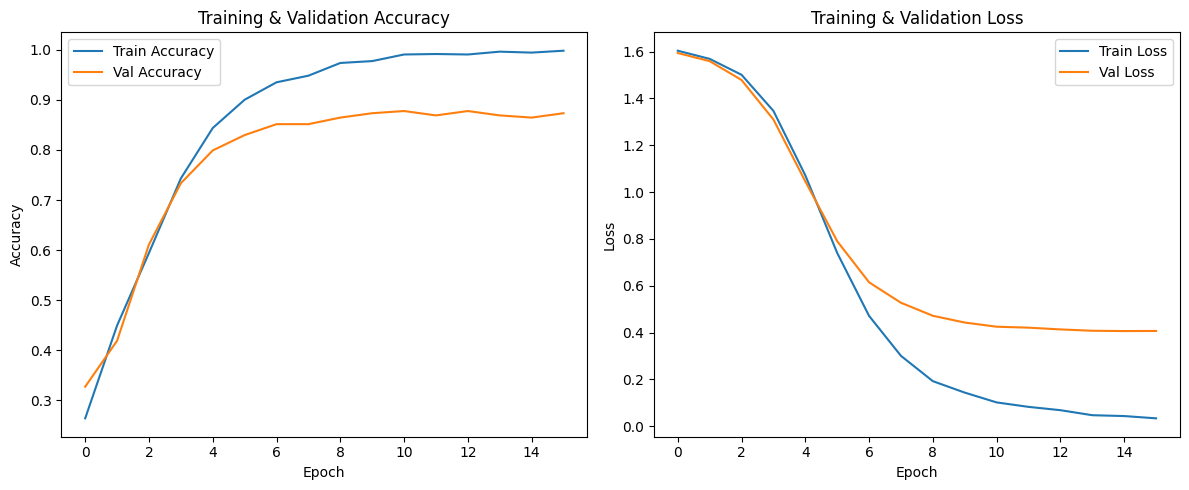

✅ Accuracy & Loss plot saved in 'trained' folder!


In [5]:
# ---------------------------
# 0. Imports
# ---------------------------
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# ---------------------------
# 1. Paths
# ---------------------------
augmented_file = r"C:\Users\WINDOWS 1O\Desktop\EmotiSense\processed\emotion_augmented.csv"
trained_dir = r"C:\Users\WINDOWS 1O\Desktop\EmotiSense\trained"
os.makedirs(trained_dir, exist_ok=True)

# ---------------------------
# 2. Load Dataset
# ---------------------------
df = pd.read_csv(augmented_file)
df['text'] = df['text'].astype(str)
messages = df['text'].values
labels = df['emotion'].values

# ---------------------------
# 3. Encode Labels
# ---------------------------
le = LabelEncoder()
y_int = le.fit_transform(labels)
num_classes = len(le.classes_)

# One-hot encode labels
y = pd.get_dummies(y_int).values

# Save Label Encoder
with open(os.path.join(trained_dir, "label_encoder.pkl"), 'wb') as f:
    pickle.dump(le, f)
print("✅ Label Encoder saved!")

# ---------------------------
# 4. Train / Validation / Test Split
# ---------------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    messages, y, test_size=0.15, random_state=42, stratify=y_int
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1)
)

# Save split info
split_info = pd.DataFrame({
    'Split': ['Train', 'Validation', 'Test'],
    'Samples': [len(X_train), len(X_val), len(X_test)],
    'Percentage': [
        len(X_train)/len(messages)*100,
        len(X_val)/len(messages)*100,
        len(X_test)/len(messages)*100
    ]
})
split_info.to_csv(os.path.join(trained_dir, "data_split_info.csv"), index=False)
print("✅ Dataset split info saved!")
print(split_info)

# ---------------------------
# 5. TF-IDF Vectorization
# ---------------------------
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_val_tfidf = tfidf.transform(X_val).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Save TF-IDF Vectorizer
with open(os.path.join(trained_dir, "tfidf_vectorizer.pkl"), 'wb') as f:
    pickle.dump(tfidf, f)
print("✅ TF-IDF Vectorizer saved!")

# ---------------------------
# 6. Build Keras Baseline Model
# ---------------------------
input_dim = X_train_tfidf.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ---------------------------
# 7. Train Model
# ---------------------------
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_tfidf, y_train,
    validation_data=(X_val_tfidf, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ---------------------------
# 8. Save Model in .keras
# ---------------------------
model.save(os.path.join(trained_dir, "baseline_model.keras"))
print("✅ Baseline Keras model saved in .keras format!")

# ---------------------------
# 9. Save Accuracy & Loss to Text
# ---------------------------
metrics_file = os.path.join(trained_dir, "accuracy_loss.txt")
with open(metrics_file, "w") as f:
    f.write("Epoch,Train_Loss,Train_Accuracy,Val_Loss,Val_Accuracy\n")
    for i in range(len(history.history['accuracy'])):
        f.write(f"{i+1},{history.history['loss'][i]:.4f},{history.history['accuracy'][i]:.4f},"
                f"{history.history['val_loss'][i]:.4f},{history.history['val_accuracy'][i]:.4f}\n")
print(f"✅ Accuracy & Loss per epoch saved in text file: {metrics_file}")

# ---------------------------
# 10. Plot Accuracy and Loss
# ---------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(trained_dir, "accuracy_loss_plot.png"))
plt.show()
print("✅ Accuracy & Loss plot saved in 'trained' folder!")


In [7]:
# Assuming you have 'history' from model.fit()

# Print epoch-wise accuracy and loss
print("Epoch-wise Training and Validation Metrics:\n")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: "
          f"Train Loss = {history.history['loss'][i]:.4f}, "
          f"Train Accuracy = {history.history['accuracy'][i]:.4f}, "
          f"Val Loss = {history.history['val_loss'][i]:.4f}, "
          f"Val Accuracy = {history.history['val_accuracy'][i]:.4f}")

# Print final metrics
final_epoch = len(history.history['accuracy']) - 1
print("\n✅ Final Epoch Metrics:")
print(f"Train Loss = {history.history['loss'][final_epoch]:.4f}")
print(f"Train Accuracy = {history.history['accuracy'][final_epoch]:.4f}")
print(f"Validation Loss = {history.history['val_loss'][final_epoch]:.4f}")
print(f"Validation Accuracy = {history.history['val_accuracy'][final_epoch]:.4f}")


Epoch-wise Training and Validation Metrics:

Epoch 1: Train Loss = 1.6038, Train Accuracy = 0.2643, Val Loss = 1.5939, Val Accuracy = 0.3275
Epoch 2: Train Loss = 1.5690, Train Accuracy = 0.4497, Val Loss = 1.5593, Val Accuracy = 0.4192
Epoch 3: Train Loss = 1.5010, Train Accuracy = 0.5945, Val Loss = 1.4787, Val Accuracy = 0.6114
Epoch 4: Train Loss = 1.3468, Train Accuracy = 0.7432, Val Loss = 1.3100, Val Accuracy = 0.7336
Epoch 5: Train Loss = 1.0716, Train Accuracy = 0.8438, Val Loss = 1.0460, Val Accuracy = 0.7991
Epoch 6: Train Loss = 0.7401, Train Accuracy = 0.9003, Val Loss = 0.7904, Val Accuracy = 0.8297
Epoch 7: Train Loss = 0.4713, Train Accuracy = 0.9351, Val Loss = 0.6147, Val Accuracy = 0.8515
Epoch 8: Train Loss = 0.3007, Train Accuracy = 0.9483, Val Loss = 0.5274, Val Accuracy = 0.8515
Epoch 9: Train Loss = 0.1926, Train Accuracy = 0.9737, Val Loss = 0.4718, Val Accuracy = 0.8646
Epoch 10: Train Loss = 0.1438, Train Accuracy = 0.9774, Val Loss = 0.4430, Val Accuracy = 0